# A0

Author: Alex Lavaee

Collaborators: None

In [1]:
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [2]:
DATA_PATH = Path("./imgs")

In [3]:
# load original image
original_img = cv2.imread(str(DATA_PATH / "original.jpg"))

In [4]:
original_img.shape

(512, 512, 3)

## Question 1

* Create a grayscale image of your face by converting your color image using one of the conversions we discussed in class.

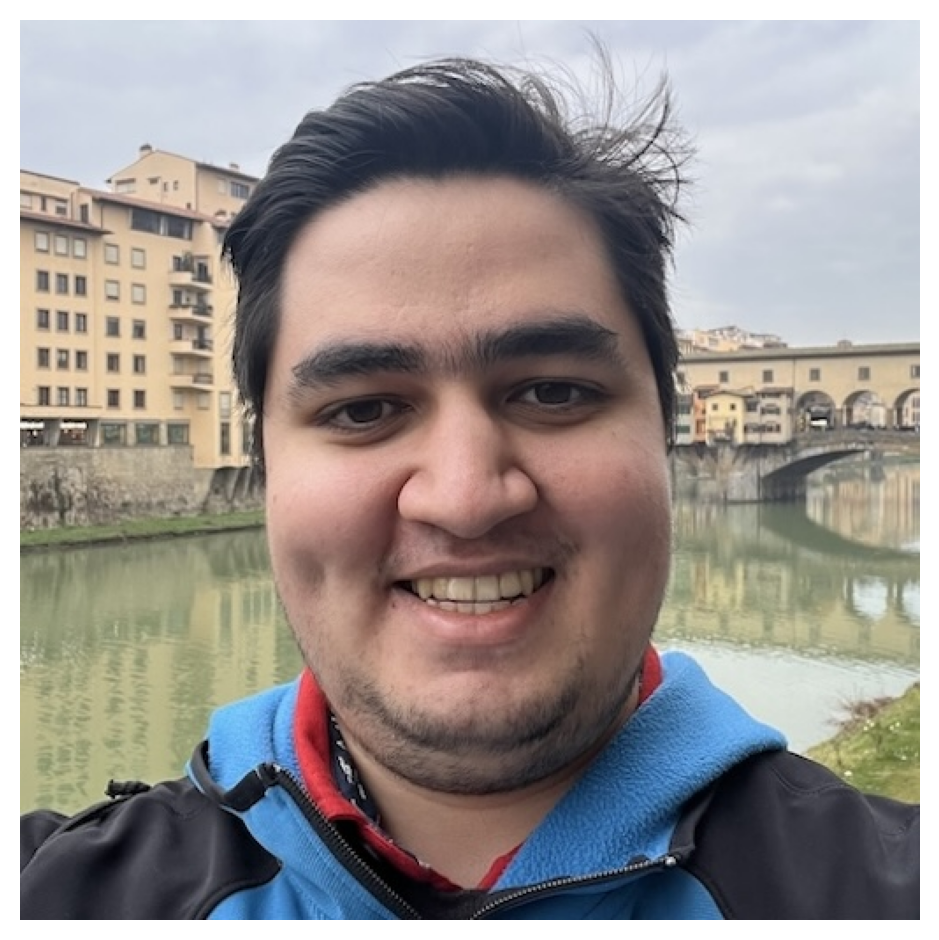

In [5]:
# display original image
fig = plt.figure(tight_layout=True, frameon=False)
ax = fig.add_subplot(111)
ax.imshow(original_img[..., ::-1])
ax.set_axis_off()

In [6]:
# convert original image to grayscale using mean of BGR axis
grayscale_img = original_img.mean(axis=-1)

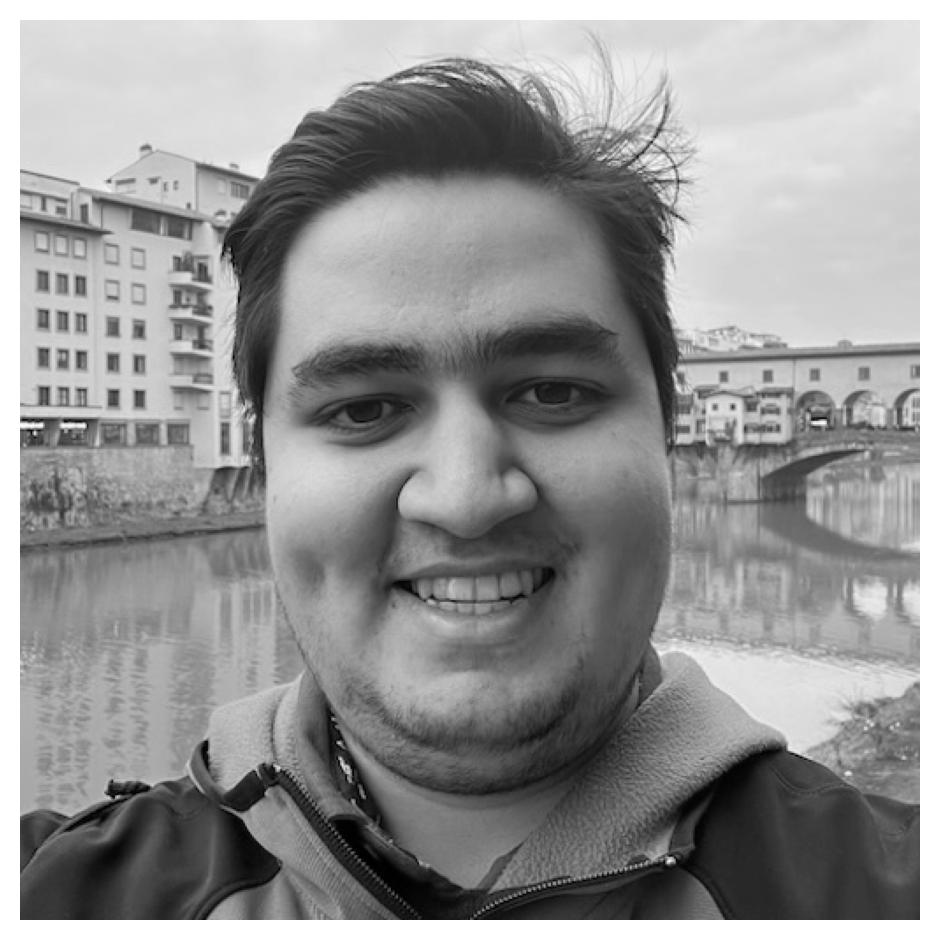

In [7]:
# display grayscale image
fig = plt.figure(tight_layout=True, frameon=False)
ax = fig.add_subplot(111)
ax.imshow(grayscale_img, cmap="gray")
ax.set_axis_off()

In [8]:
# save new image
cv2.imwrite(str(DATA_PATH / "grayscale.jpg"), grayscale_img)

True

## Question 2

* Come up with a second way of manipulating your face that produces an interesting output. For example, you may create a blurred image of your grayscale face by assigning to each pixel the average grayscale pixel value of itself and its 8 neighbors. Hint: You may have to run your program a few times to make the blurring noticeable.

In [9]:
def calculate_target_size(
    dim: int, kernel_size: int, padding: int = 0, stride: int = 1
) -> int:
    return (dim - kernel_size + 2 * padding) // stride + 1

In [10]:
def generate_gaussian_kernel(kernel_size: int, sigma: float) -> np.ndarray:
    ax = np.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    kernel /= kernel.sum()
    return kernel

In [11]:
def blur_image(image: np.ndarray, sigma: float = 1.0, kernel_size: int = 3) -> np.ndarray:
    # use gaussian blur
    kernel = generate_gaussian_kernel(kernel_size=kernel_size, sigma=sigma)
    h, w = image.shape

    h, w = (
        calculate_target_size(dim=h, kernel_size=kernel_size, padding=0, stride=1),
        calculate_target_size(dim=w, kernel_size=kernel_size, padding=0, stride=1),
    )

    conv_image = np.zeros(shape=(h, w))

    for i in range(h):
        for j in range(w):
            conv_image[i, j] = np.sum(
                image[i : i + kernel_size, j : j + kernel_size] * kernel
            )

    return conv_image

In [12]:
blurred_img = blur_image(grayscale_img, sigma=2.0, kernel_size=7)

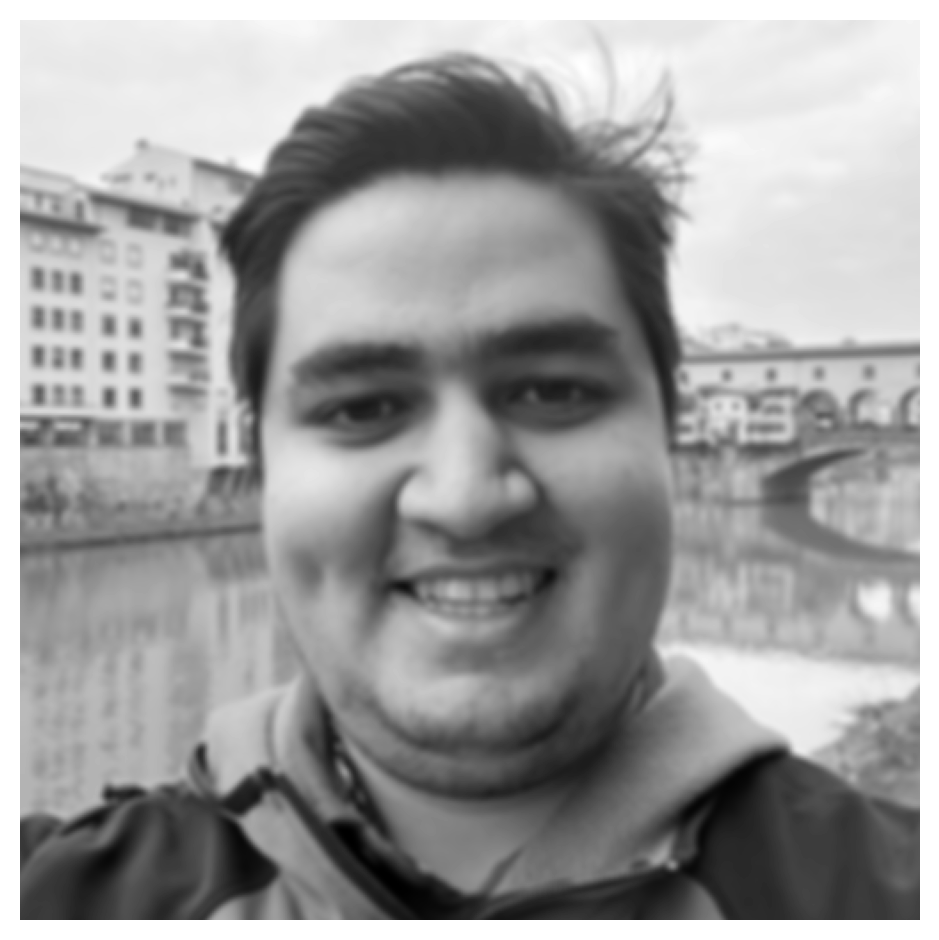

In [13]:
# display grayscale image
fig = plt.figure(tight_layout=True, frameon=False)
ax = fig.add_subplot(111)
ax.imshow(blurred_img, cmap="gray")
ax.set_axis_off()

In [14]:
# save new image
cv2.imwrite(str(DATA_PATH / "blurred.jpg"), blurred_img)

True